# I want to make beautiful plots like I've seen in the studies! How to make them?

You already did some calculations by hands and in Python! Now, let's see, how they will look like using R.

If you have any questions (even though you think they are simple), do not hesitate to ask us or to write in private messages!

## Starting point

Create a new notebook using the following [the link](https://colab.research.google.com/#create=true&language=r). Did it?

Great! Here we go!

Let's check, if we're doing what we need!

In [1]:
R.version.string

[1] "R version 4.0.4 (2021-02-15)"

## Just some basic things...

In [3]:
v <- c(1,2,3,4,5,6,7,8) #just created a vector
v 

[1] 1 2 3 4 5 6 7 8

In [4]:
mean_value <- mean(v)
standard_deviation <- sd(v)

How to look at these two values?

In [5]:
print(mean_value, standard_deviation)

[1] 4.5


WHY WE HAVE ONLY ONE VALUE???

In [6]:
print(c(mean_value, standard_deviation))

[1] 4.50000 2.44949


Hmmm. We need to create a vector in order to work with two values at the same time!

## Not so basic things!

Don't worry, it will be funny!

In [7]:
install.packages("devtools") #will help us to install required packages
devtools::install_github("guido-s/meta") #installation of meta - package for a meta-analysis

library(meta)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




RcppEigen    (NA -> 0.3.3.9.1) [CRAN]
statmod      (NA -> 1.4.35   ) [CRAN]
nloptr       (NA -> 1.2.2.2  ) [CRAN]
minqa        (NA -> 1.2.4    ) [CRAN]
CompQuadForm (NA -> 1.4.3    ) [CRAN]
lme4         (NA -> 1.1-26   ) [CRAN]
metafor      (NA -> 2.4-0    ) [CRAN]


Installing 7 packages: RcppEigen, statmod, nloptr, minqa, CompQuadForm, lme4, metafor

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpWQkPM7/remotes394aaa4e13/guido-s-meta-96f86f3/DESCRIPTION’
─  preparing ‘meta’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘meta_4.18-0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading 'meta' package (version 4.18-0).
Type 'help(meta)' for a brief overview.



I have prepared file, so we will use it to our meta-analysis!

In [8]:
our_data <- read.csv('./Data/sources_for_ma.txt')
our_data

X,author,year,number_of_methods_for_merge,number_of_methods_for_quick,mean_merge,std_merge,mean_quick,std_quick,type
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,Bunse et al. (2009),0,3,3,3.156294,9.022745e-01,1.124992,0.7489404,M_0
1,Bunse et al. (2009),0,2,3,1.413711,3.102606e-01,3.617372,2.3706130,M_0
3,Verma et al. (2018),0,10,10,7.167900,4.091190e+00,4.144600,2.7592677,M_2
4,Balakrishnan et al. (2017),0,4,4,0.070750,3.705289e-02,0.067500,0.0353789,M_3
5,Inoue (2016),0,4,4,776.750000,3.054214e+02,602.750000,213.3297526,M_4
6,Abulnaja et al. (2018),0,5,5,787.098000,5.582226e+02,964.272000,846.4410794,M_5
7,Aljabri et al. (2019),0,31,31,3422.707097,8.916599e+03,2733.668065,6982.5311538,M_6


In [9]:
str(our_data) #structure of our dataset

'data.frame':	7 obs. of  10 variables:
 $ X                          : int  0 1 3 4 5 6 7
 $ author                     : chr  "Bunse et al. (2009)" "Bunse et al. (2009)" "Verma et al. (2018)" "Balakrishnan et al. (2017)" ...
 $ year                       : num  0 0 0 0 0 0 0
 $ number_of_methods_for_merge: num  3 2 10 4 4 5 31
 $ number_of_methods_for_quick: num  3 3 10 4 4 5 31
 $ mean_merge                 : num  3.1563 1.4137 7.1679 0.0708 776.75 ...
 $ std_merge                  : num  0.9023 0.3103 4.0912 0.0371 305.4214 ...
 $ mean_quick                 : num  1.125 3.6174 4.1446 0.0675 602.75 ...
 $ std_quick                  : num  0.7489 2.3706 2.7593 0.0354 213.3298 ...
 $ type                       : chr  "M_0" "M_0" "M_2" "M_3" ...


In [10]:
min(our_data$number_of_methods_for_java) #minimum number of experiments done in the considered papers

Warning message in min(our_data$number_of_methods_for_java):
“no non-missing arguments to min; returning Inf”


[1] Inf

In [11]:
summary(our_data) #the descriptive statistics of our dataset

       X            author               year   number_of_methods_for_merge
 Min.   :0.000   Length:7           Min.   :0   Min.   : 2.000             
 1st Qu.:2.000   Class :character   1st Qu.:0   1st Qu.: 3.500             
 Median :4.000   Mode  :character   Median :0   Median : 4.000             
 Mean   :3.714                      Mean   :0   Mean   : 8.429             
 3rd Qu.:5.500                      3rd Qu.:0   3rd Qu.: 7.500             
 Max.   :7.000                      Max.   :0   Max.   :31.000             
 number_of_methods_for_quick   mean_merge         std_merge       
 Min.   : 3.000              Min.   :   0.071   Min.   :   0.037  
 1st Qu.: 3.500              1st Qu.:   2.285   1st Qu.:   0.606  
 Median : 4.000              Median :   7.168   Median :   4.091  
 Mean   : 8.571              Mean   : 714.052   Mean   :1397.941  
 3rd Qu.: 7.500              3rd Qu.: 781.924   3rd Qu.: 431.822  
 Max.   :31.000              Max.   :3422.707   Max.   :8916.599  

In [14]:
ma_random <- metacont(n.e = our_data$number_of_methods_for_merge,
                  mean.e = our_data$mean_merge,
                  sd.e = our_data$std_merge,
                  label.e = 'Merge Sort',
                  n.c = our_data$number_of_methods_for_quick,
                  mean.c = our_data$mean_quick,
                  sd.c = our_data$std_quick,
                  label.c = 'Quick Sort',
                  studlab = our_data$author,
                  comb.fixed = FALSE,
                  comb.random = TRUE,
                  method.tau = "SJ",
                  hakn = TRUE,
                  prediction = TRUE,
                  sm = "SMD")
ma_random

                               SMD            95%-CI %W(random)
Bunse et al. (2009)         1.9599 [-0.5185; 4.4382]        5.4
Bunse et al. (2009)        -0.8245 [-2.9299; 1.2810]        7.0
Verma et al. (2018)         0.8298 [-0.0925; 1.7521]       19.7
Balakrishnan et al. (2017)  0.0780 [-1.3089; 1.4650]       12.8
Inoue (2016)                0.5744 [-0.8667; 2.0155]       12.2
Abulnaja et al. (2018)     -0.2232 [-1.4691; 1.0227]       14.6
Aljabri et al. (2019)       0.0850 [-0.4131; 0.5830]       28.3

Number of studies combined: k = 7

                        SMD            95%-CI    t p-value
Random effects model 0.2827 [-0.3175; 0.8828] 1.15  0.2929
Prediction interval         [-1.2525; 1.8179]             

Quantifying heterogeneity:
 tau^2 = 0.2965 [0.0000; 2.6078]; tau = 0.5445 [0.0000; 1.6149]
 I^2 = 0.0% [0.0%; 68.5%]; H = 1.00 [1.00; 1.78]

Test of heterogeneity:
    Q d.f. p-value
 5.56    6  0.4744

Details on meta-analytical method:
- Inverse variance method
- Sidik-Jo

To read more about the meta-package and the function metacont you can [here](https://cran.r-project.org/web/packages/meta/meta.pdf)

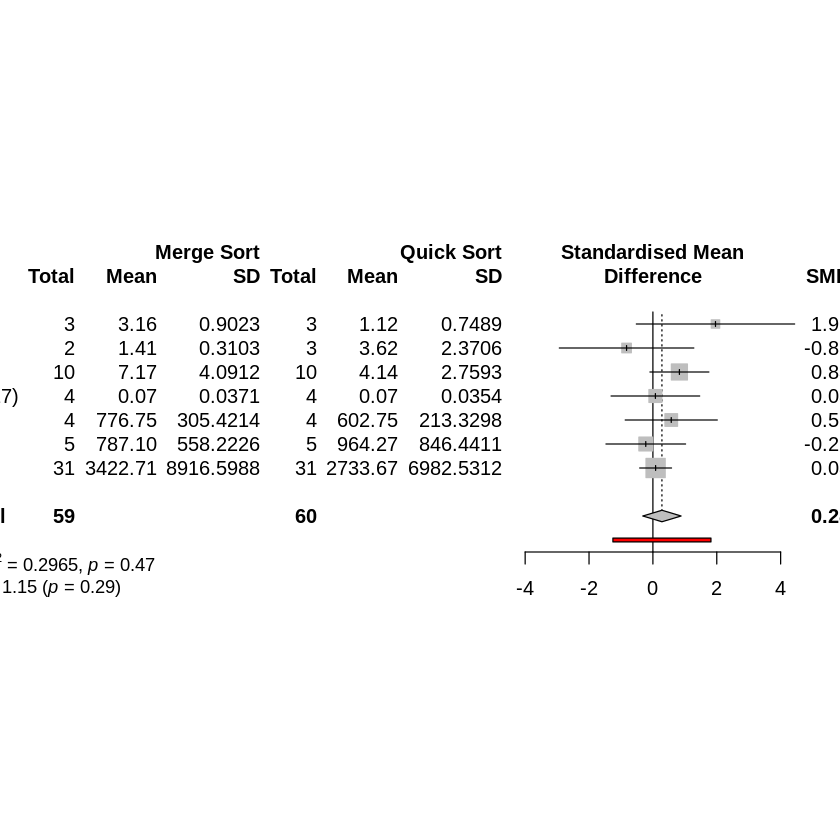

In [15]:
forest(ma_random, test.overall.random=TRUE)

In [16]:
# tiff("c++_java.tiff", units="in", width=12, height=5, res=100)
svg("quick_merge.svg", width=12, height=5)
forest(ma_random, test.overall.random=TRUE)
dev.off()

png 
  2

In [ ]:
ma_fixed <- metacont(n.e = our_data$number_of_methods_for_c..,
                  mean.e = our_data$mean_c..,
                  sd.e = our_data$sd_c..,
                  label.e = 'C++',
                  n.c = our_data$number_of_methods_for_java,
                  mean.c = our_data$mean_java,
                  sd.c = our_data$sd_java,
                  label.c = 'Java',
                  studlab = our_data$author,
                  comb.fixed = TRUE,
                  comb.random = FALSE,
                  method.tau = "SJ",
                  hakn = TRUE,
                  prediction = TRUE,
                  sm = "SMD")
ma_fixed

In [ ]:
tiff("c++_java_fixed.tiff", units="in", width=12, height=5, res=100)
forest(ma_fixed, test.overall.random=FALSE)
dev.off()

## References



*   [Towards Data Science: How to use R in Google Colab ](https://towardsdatascience.com/how-to-use-r-in-google-colab-b6e02d736497)
*   [Meta-package documentation](https://cran.r-project.org/web/packages/meta/meta.pdf)



